<h6 style='text-align:center;font-size:40px;background-color:SALMON;border:20px;color:white'>BELARUS CAR PRICE PREDICTION<h6>

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>CONTENTS<h2>

1. Import Relevant Libraries
2. Data Inspection
3. Data Cleaning
4. Exploratory Data Analysis
5. Feature Engineering 
6. Building Model

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:50px;color:white'>PROBLEM STATEMENT<h2>

## The aim of this project is to predict the price of the car in Belarus, by analyzing the car features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. The project also aims to find out the set the of variables that has most impact on the car price. The dataset has been taken from kaggle. It has 56244 rows and 12 columns.



<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>DATA<h2>

## Data Dictionary

| Variable | Description |
| --- | --- |
| make| machine firm |
| model| machine model |
|price USD| price in USD (target variable)|
| year| year of production|
| condition| represents the condition at the sale moment (with mileage, for parts, etc)|
| mileage| mileage in kilometers|
| fuel type| type of the fuel (electro, petrol, diesel)|
| volume(cm3)| volume of the engine in cubic centimeters|
| color| color of the car|
| transmission| type of transmission|
| drive unit| drive unit|
| segment| segment of the car|

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 1: Importing the Relevant Libraries <h2>

In [19]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 2. Data Inspection<h2>

In [3]:
df = pd.read_csv('cars.csv')

In [4]:
df.head(20)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B
5,mazda,2,3400,2005,with mileage,150000.0,petrol,1300.0,blue,mechanics,front-wheel drive,B
6,mazda,2,5000,2008,with mileage,112000.0,petrol,1300.0,gray,mechanics,front-wheel drive,B
7,mazda,2,7300,2009,with mileage,95000.0,petrol,1500.0,other,auto,front-wheel drive,B
8,mazda,2,6400,2010,with mileage,93804.0,petrol,1500.0,other,mechanics,front-wheel drive,B
9,mazda,2,6132,2008,with mileage,196511.0,petrol,1500.0,other,auto,front-wheel drive,B


In [20]:
df.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1905
segment                5291
dtype: int64

In [49]:
df.shape

(51434, 10)

In [48]:
df.dtypes

priceUSD                 int64
year                     int64
condition                int64
mileage(kilometers)    float64
fuel_type                int64
volume(cm3)            float64
color                    int64
transmission             int64
drive_unit               int64
make_segment             int64
dtype: object

In [12]:
df.nunique()

make                     96
model                  1034
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
segment                   9
dtype: int64

df.fuel_type.value_counts()

In [15]:
data = [df]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df[col].value_counts())


Frequency of Categories for variable make
volkswagen    6861
audi          4030
bmw           4013
opel          3779
renault       3713
              ... 
jac              1
asia             1
tagaz            1
saipa            1
dong-feng        1
Name: make, Length: 96, dtype: int64

Frequency of Categories for variable model
passat      2086
5-seriya    1476
a6          1276
golf        1070
astra       1013
            ... 
grace          1
golf-r32       1
rs7            1
rs5            1
ax7            1
Name: model, Length: 1034, dtype: int64

Frequency of Categories for variable condition
with mileage    55278
with damage       512
for parts         454
Name: condition, dtype: int64

Frequency of Categories for variable fuel_type
petrol        36405
diesel        19792
electrocar       47
Name: fuel_type, dtype: int64

Frequency of Categories for variable color
black       12385
silver      10075
blue         8083
gray         5807
white        5292
green        3911
other 

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 3. Data Cleaning <h2>

In [21]:
# Droping the columns that are not needed for the analysis
df.drop(columns = ['model','segment'], inplace=True)

In [22]:
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

Since there are many car maker, and it is difficult to analyze them individually, so we will group them into categories : Luxury European, Mainstream European, Russina/ Eastern European, Asian, American, Speciality, and Other. The grouping is based on the make of the car and country of origin.

In [23]:
# Categorizing the car make
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'
    


In [24]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [25]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 4. Exploratory Data Analysis <h2>

### Car Make Segment

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Luxury European'),
  Text(1, 0, 'Mainstream European'),
  Text(2, 0, 'Russian/Eastern European'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Specialty'),
  Text(6, 0, 'Asian')])

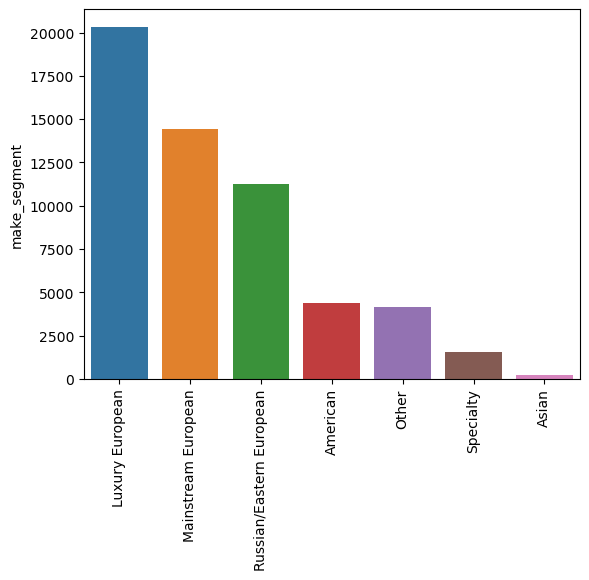

In [26]:
sns.barplot(x=df['make_segment'].unique(), y=df['make_segment'].value_counts(), data=df)
plt.xticks(rotation=90)

In the dataset, most of the cars are european based(particulary majority of the are Luxury followed by Mainstream and Russian/Eastern European). However the dataset also has American and Asian cars. There are also some speciality cars such as Tesla, McLaren, Bentley, etc. The dataset also has some cars that are not categorized into any of the above categories.



### Categorical Variable Distribution

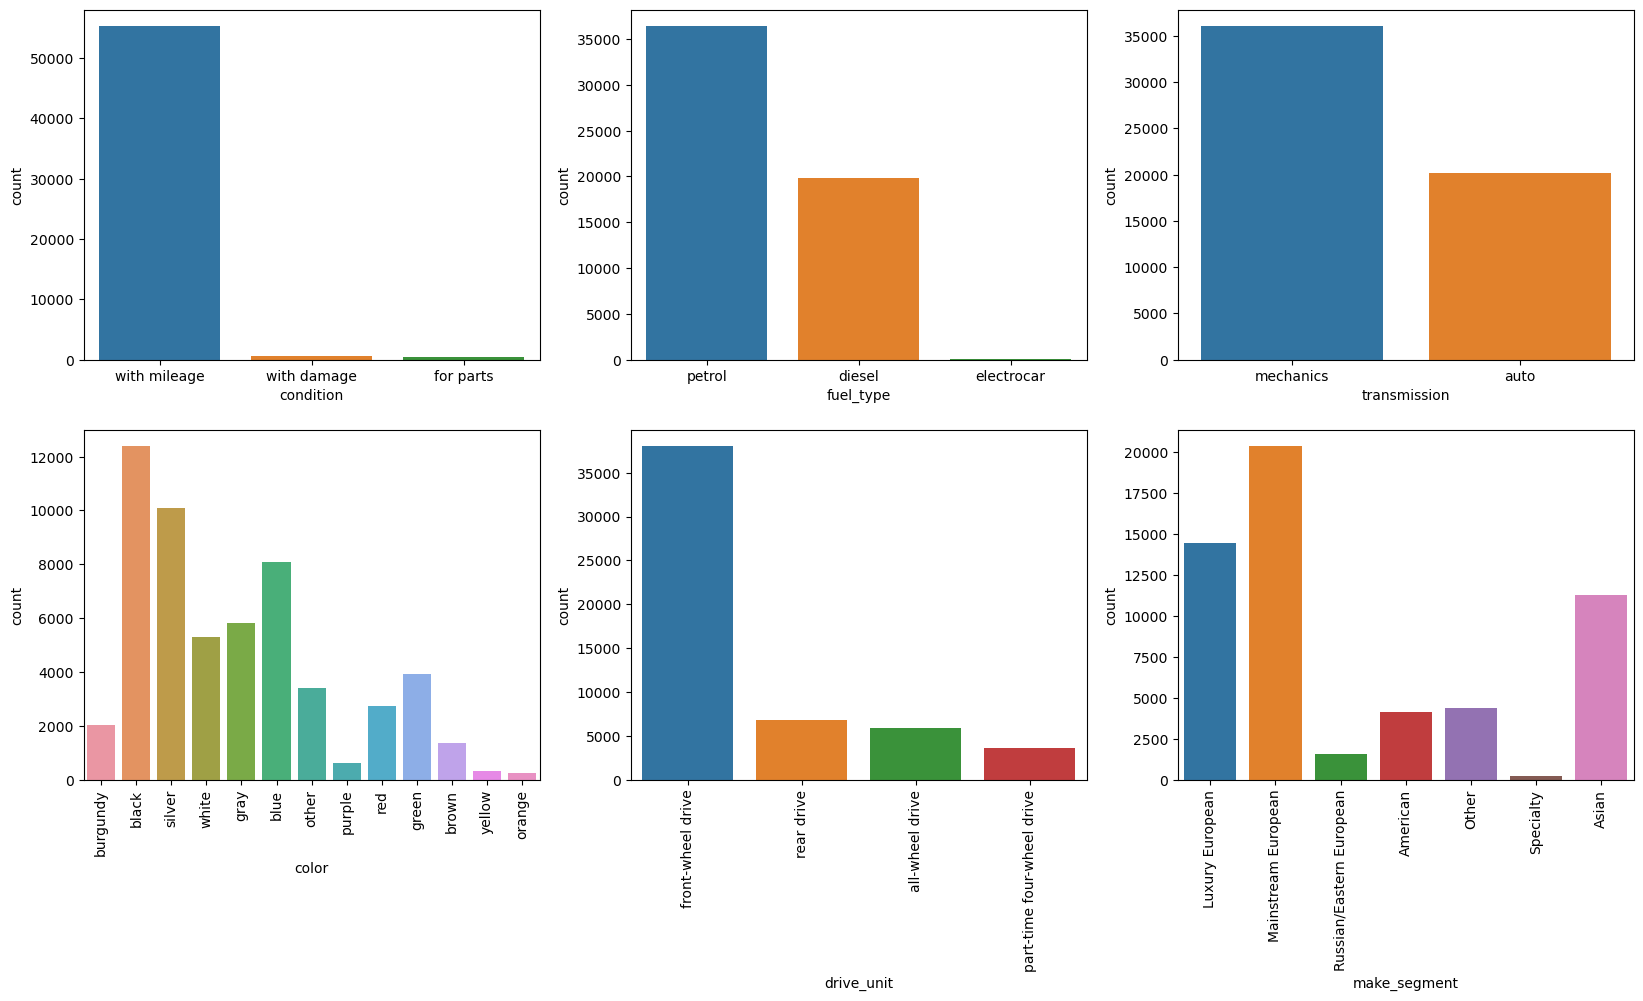

In [27]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=df, ax=ax[0,0])
sns.countplot(x='fuel_type', data=df, ax=ax[0,1])
sns.countplot(x='transmission', data=df, ax=ax[0,2])
sns.countplot(x='color', data=df, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=df, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

From the above graphs, we get an overview regarding the data across the categorical variables in the data set.From the above graphs it is clear that majority of the cars being sold are in working conditions, majority of them run on petrol, followed by diesel and hardly do any of them run on electricity. Most of the cars have manual transmission, with front wheel drive, having colors such as balck, silver, blue, white, and grey.

### Continuous Variable Distribution

<Axes: xlabel='volume(cm3)', ylabel='Count'>

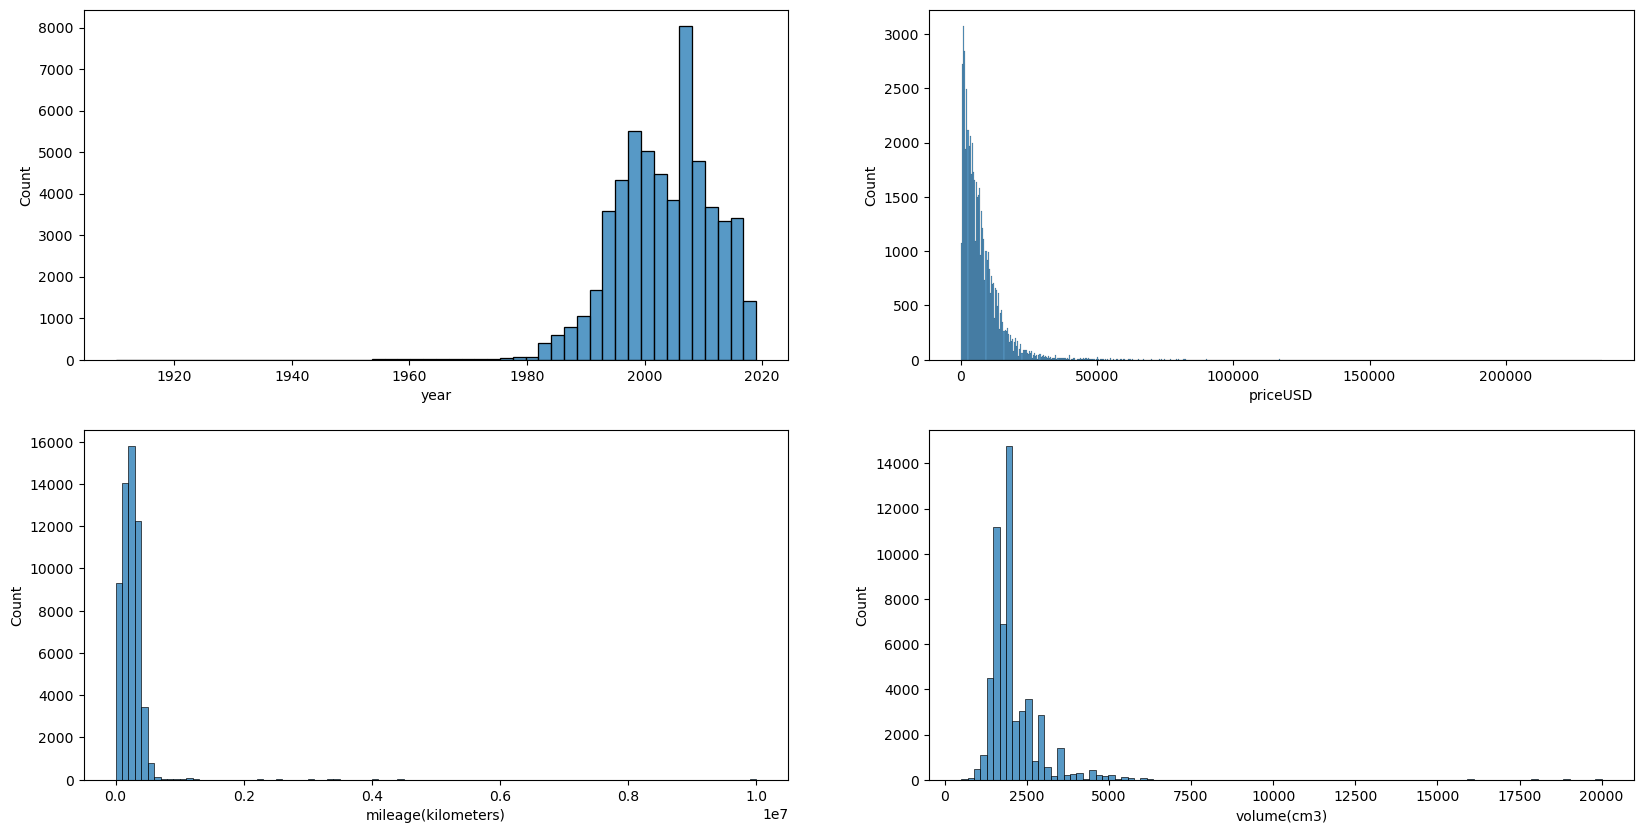

In [28]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df['year'], ax=ax[0,0], bins = 50)
sns.histplot(df['priceUSD'], ax=ax[0,1])
sns.histplot(df['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df['volume(cm3)'], ax=ax[1,1], bins = 100)

The above graphs shows the distribution of the data across continuous variables. Majority of the cars are manufactured between 1990 to 2019,having price less than 50k USD, mileage less than 1 million km, engine volume between 1750 to 2000 cm3.

Since most of the cars are manufactured after 1980, so I will only consider the cars manufactured after 1980.

In [29]:
df= df[df['year']>1980]

### Price and Make

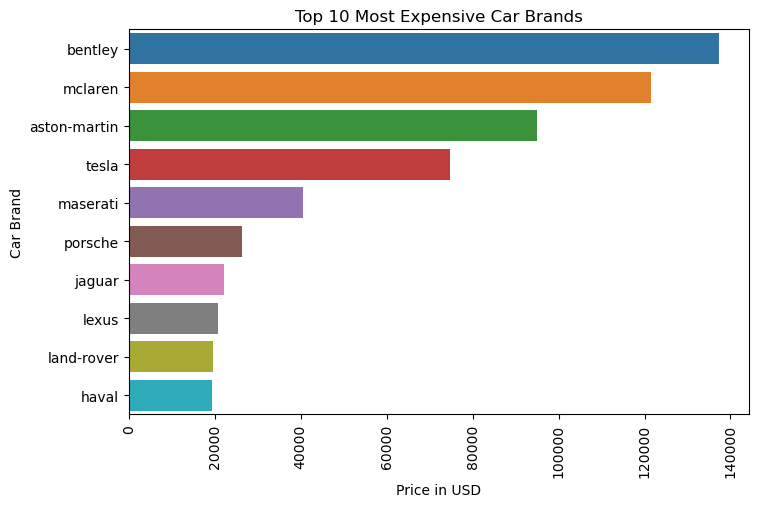

In [30]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)

#b Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demodf)
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

This graph shows top 10 most expensive car brands in the data set. The top 5 most expensive car brands are Bentley, Mclaren, aston-martin, Tesla and meserati.

### Price and Condition

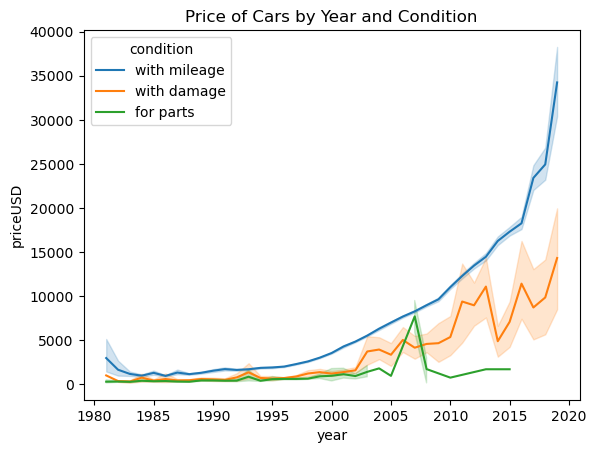

In [31]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

This graph shows the relationship between the price and the year of the car along with the selling codition of the car. Cars, which are sold in working condition, are more expensive and their prices increased with time, having exponential increase between 2015 to 2020. Cars, which were damaged, had  similar prices to tha cars which were sold for parts between 1980 to 2000. However, the price of the damaged cars increased significanlty after 2000. Cars, which were sold for parts, tend to have minimal price and their prices increased very little with time.

The cars running on petrol and diesel have similar mileage, however their prices are quite different. The cars running on petrol tend to have higher price than those running on diesel. The cars running on electricity tend to have higher prices and low mileage.

### Price and Transmission

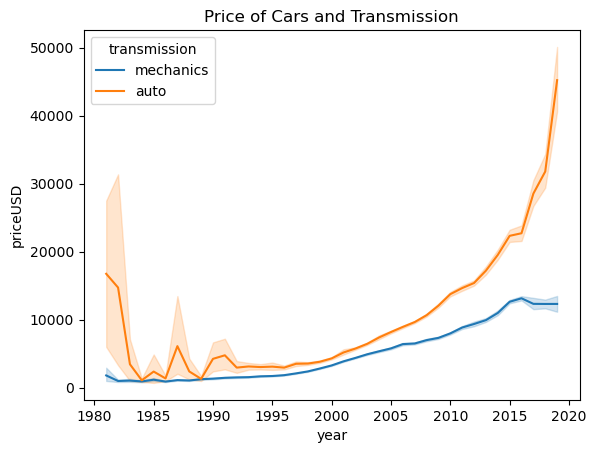

In [32]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

This graph reveals the changes in the car price based on their transmission. The price of the cars with automatic transmission decreased significantly after 1983, however its price increased exponentially after 2000. However, the price of the cars with manual transmission is always less than the cars with automatic transmission showing similar increase in price after 2000.

### Price and Fuel Type

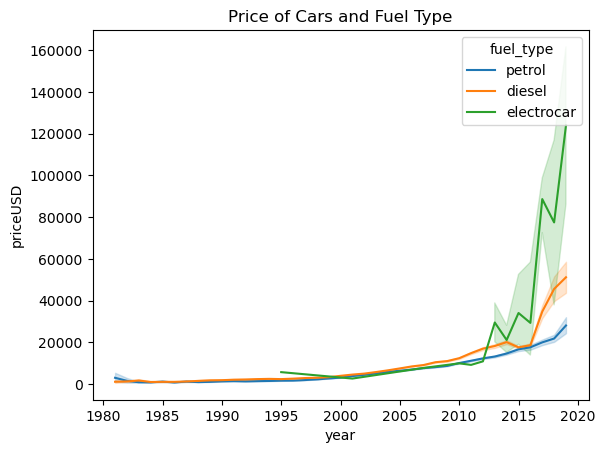

In [33]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

Till 2005, there was no major difference in car price of cars running on petrol and diesel. However, after 2015, the price of the cars running on petrol increased significantly, whereas the price of the cars running on diesel increased with a very small margin. The graph also highloghts the introducttion of electro cars, which runs on electricity in 1995. However, the price of the electro cars increases exponentially after 2015, having the highest car price based on fuel type



### Price and Drive Unit

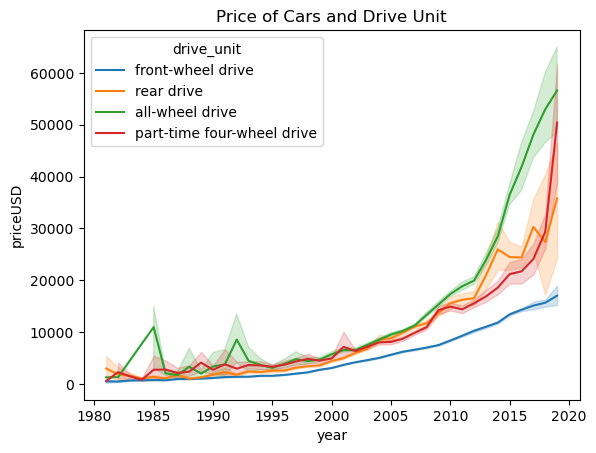

In [34]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'drive_unit')
plt.title('Price of Cars and Drive Unit')
plt.show()

Between 1980 to 1995, there was no much difference in the prices of cars based on the drive unit. However, after 1995, the price of the cars with front wheel drive increased at a slower pace as compared to other drive units. The price of the cars with all wheel drive increased significantly after 2005, having the highest price among all the drive units, followed by part-time four wheel drive and rear wheel drive.

### Price and Brand Segment

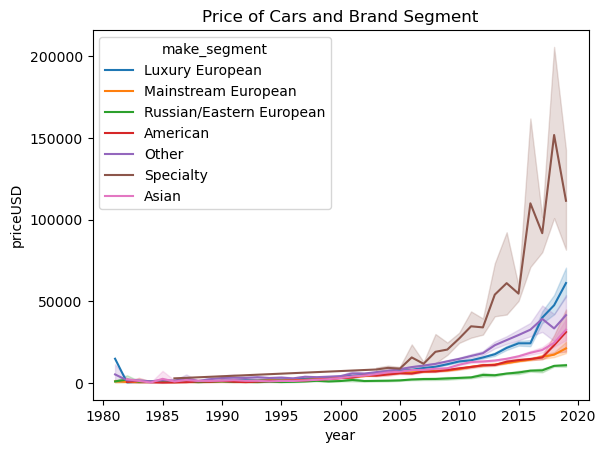

In [35]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

This graph shows the surge in car prices after 2005, where we can see that the price of the specialty car segment increased significanlty followed by the luxury european car, American, Asian and Mainstream European car segment. The price of the Russian/Eastern European car segment increased at a slower pace as compared to other segments and is lowest among all the segments.

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 5. Feature Engineering<h2>

In [36]:
# checking for null values
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
make_segment              0
dtype: int64

Since, the count of null values is small in comparison to the actual size of the dataset, I will be dropping the null values from the dataset.

In [37]:
df.dropna(inplace=True)

In [38]:
df.drop(columns=['make'], inplace=True)

In [39]:
from sklearn.preprocessing import LabelEncoder

# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

# Label encoding Object 
le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


## Correlation Matrix Heatmap

<Axes: >

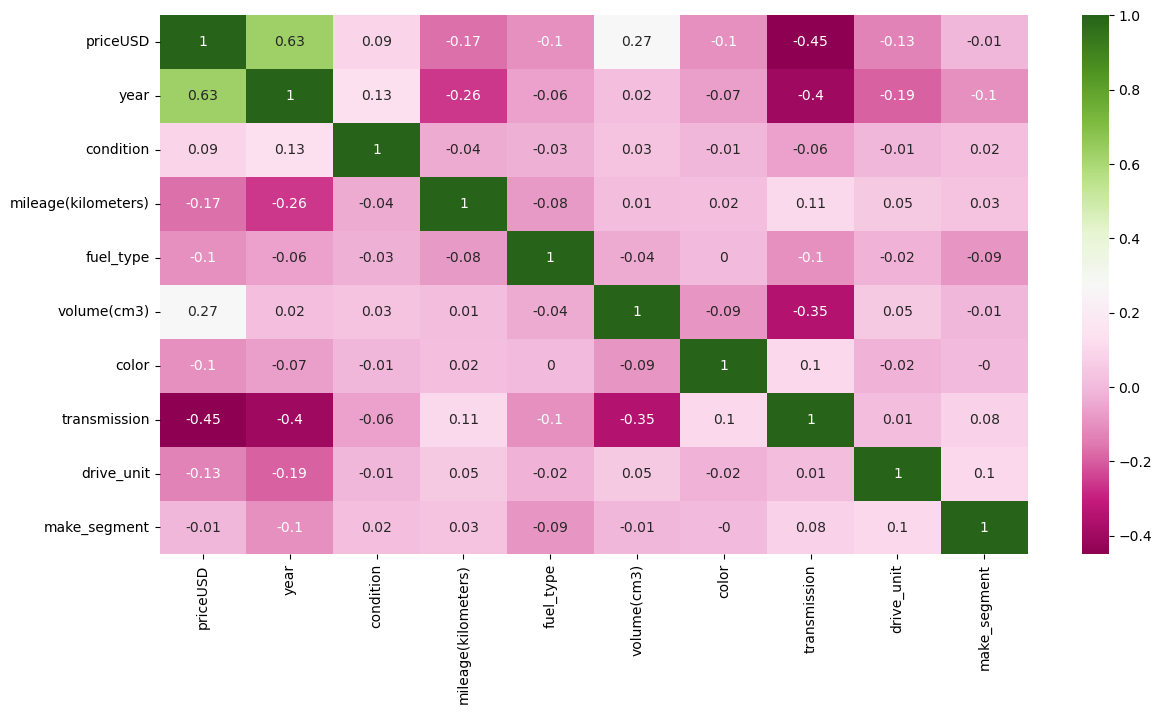

In [40]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'PiYG')

## Outlier Removal

In [41]:
# Using Z-score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

threshold = 3

#columns with outliers
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

#removing outliers
df = df[(z < 3).all(axis=1)]

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 6. Building Model<h2>

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']), df['priceUSD'], test_size=0.2, random_state=42)

In [43]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [44]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [45]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3100.4898
- Mean Absolute Error: 2232.2223
- R2 Score: 0.6956
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3168.2832
- Mean Absolute Error: 2269.9736
- R2 Score: 0.6863


Lasso
Model performance for Training set
- Root Mean Squared Error: 3100.4926
- Mean Absolute Error: 2231.9211
- R2 Score: 0.6956
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3168.3112
- Mean Absolute Error: 2269.7402
- R2 Score: 0.6863


Ridge
Model performance for Training set
- Root Mean Squared Error: 3100.4898
- Mean Absolute Error: 2232.2132
- R2 Score: 0.6956
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3168.2838
- Mean Absolute Error: 2269.9667
- R2 Score: 0.6863


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3036.4524
- Mean Absolute Error: 2028.7402


In [46]:
model = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=True)

In [47]:
model

,Model Name,R2_Score
3,K-Neighbors Regressor,0.541852
6,AdaBoost Regressor,0.588158
1,Lasso,0.686334
2,Ridge,0.686339
0,Linear Regression,0.686339
4,Decision Tree,0.797386
5,Random Forest Regressor,0.877644


## Conclusion

The aim of this project was to predict the price of the car in Belarus, by analyzing the car features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color, and segment. During the exploratory data analysis, it was found that there has been a significant increase in car prices in Belarus after the year 2000. The cars which runs on petrol have automatic transmission have higher price has compared to diesel cars with manual transmission. However, the elctric cars are distinctively expensive than the other cars. The cars with all wheel drive have the highest price among all the drive units. The speciality segment cars have the highest price among all the segments followed by luxury european, american, asian car segments.

The Random Forest Regressor model was used to predict the car price. The model was able to predict the car price with 87.76% accuracy. The most important features for predicting the car price were found to be year and volume of the engine.